In [1]:

import pandas as pd
import hiddenlayer
pd.set_option('display.max_columns', None)
# 读取数据并量化
df = pd.read_csv ('/Users/lycoris/Desktop/other/github/MCM2024/Data/Wimbledon_featured_matches.csv')
for i, score in enumerate(['15', '30', '40', 'AD']):
    df.loc[(df.p1_score== score) , 'p1_score'] = i + 1
    df.loc[(df.p2_score== score) , 'p2_score'] = i + 1
df[ 'p1_score' ] = df['p1_score' ].astype(int)
df[ 'p2_score' ] = df['p2_score'].astype(int)
df = df.drop(["match_id", 'player1', 'player2', "serve_width", "serve_depth","return_depth"], axis=1)
def tf(text):
  return 1 if text == 'T' else -1 if text == 'F' else 0
df['winner_shot_type'] =  df["elapsed_time"].apply(tf)
def convert_to_seconds(text):
  hours, minutes, seconds = text.split(':')
  return int(hours) * 3600 + int(minutes) * 60 + int(seconds)
df["elapsed_time"] = df["elapsed_time"].apply(convert_to_seconds)
df.dropna(inplace=True)
# 删除 "elapsed_time" 列
elapsed_time = df.pop('point_victor') - 1
# 将 "elapsed_time" 列插入到 DataFrame 的最后一列
df.insert(loc=len(df.columns), column='label', value=elapsed_time)
df.to_csv('/Users/lycoris/Desktop/other/github/MCM2024/Data/Dataset.csv')
df

/var/folders/yd/8l75ptfx6hv4k26q7mppv_nh0000gn/T/ipykernel_63313/1414194012.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,server,serve_no,p1_points_won,p2_points_won,game_victor,set_victor,p1_ace,p2_ace,p1_winner,p2_winner,winner_shot_type,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_net_pt_won,p2_net_pt_won,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,label
0,0,1,1,1,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.000,7.840,2,95.0,1
1,38,1,1,2,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.253,7.094,1,118.0,0
2,61,1,1,3,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13.800,19.808,4,120.0,1
3,91,1,1,4,0,0,0,0,1,2,1,1,2,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,51.108,75.631,13,130.0,0
4,141,1,1,5,0,0,0,0,2,2,1,1,3,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.649,0.813,1,112.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,16798,5,10,330,2,2,5,4,0,1,1,1,165,165,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,38.620,50.971,11,123.0,0
7280,16843,5,10,331,2,2,5,4,1,1,1,1,166,165,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,17.533,27.766,5,114.0,0
7281,16880,5,10,332,2,2,5,4,2,1,1,1,166,166,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.882,18.328,4,124.0,1
7282,16912,5,10,333,2,2,5,4,2,2,1,1,167,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.893,10.537,1,130.0,0


In [2]:
# # 提取所需特证
# x1_ls,x2_ls,x3_ls,x4_ls,x5_ls,x6_ls,x7_ls,x8_ls,x9_ls,x10_ls,\
# x12_ls,x13_ls,x14_ls,x15_ls,x16_ls=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
# label_ls = []
# label = 0

# for match_id,set_no,game_no,point_no in zip(df.match_id, df.set_no, df.game_no, df.point_no):
#     match = df[df.match_id == match_id]
#     set_ = match[ match.set_no == set_no]
#     game_ = set_[set_.game_no == game_no]
#     point_ = game_[game_.point_no == point_no]

#     # 如果x>0，则对p1有利，如果x<0，则对p2有利
#     x1 = point_[ 'p1_games' ].values[0]-point_[ 'p2_games' ].values[0] # p1局领先进度
#     x2 = point_[ 'p1_score' ].values[0]- point_[ 'p2_score' ].values[0] # p1小分领先进度
#     x3 = 1 if point_[ 'serve_no' ].values[0] == 1 else 0 # p1是否发球
#     x4 = 1 if label==1 else 0 # p1上一小分是否得到
#     x5 = point_[ 'p1_sets' ].values[0] - point_[ 'p2_sets' ].values[0] # p1盘领先进度
#     # p1连胜局数
#     x6 = 1 if 1 in game_['p1_ace'].values else 0
#     x7 = 1 if 1 in game_['p1_winner'].values else 0
#     x8 = 1 if 1 in game_['p1_double_fault'].values else 0
#     x9 = 1 if 1 in game_['p1_unf_err'].values else 0
#     x10 = game_[ 'p1_net_pt_won' ]. sum()/game_[ 'p1_net_pt' ].sum() if game_[ 'p1_net_pt' ].sum() != 0 else 0

#     index = match.index.tolist( ).index(point_.index.tolist()[0])
#     x12 = match.iloc [ : index+1][ 'p1_distance_run' ].sum()
#     x13 = match.iloc [ index-2 :index+1][ 'p1_distance_run' ].sum()
#     x14 = point_[ 'p1_distance_run' ].values[0]
#     x15 = point_[ 'speed_mph' ].values[0]
#     x16 = x15 * x3

#     label = 1 if point_[ 'point_victor' ].values[0] == 1 else 0
#     label_ls.append(label)
#     x1_ls.append(x1)
#     x2_ls.append(x2)
#     x3_ls.append(x3)
#     x4_ls.append(x4)
#     x5_ls.append(x5)
#     x6_ls.append(x6)
#     x7_ls.append(x7)
#     x8_ls.append(x8)
#     x9_ls.append(x9)
#     x10_ls.append(x10)
#     x12_ls.append(x12)
#     x13_ls.append(x13)
#     x14_ls.append(x14)
#     x15_ls.append(x15)
#     x16_ls.append(x16)


# dataset = pd.DataFrame({'x1': x1_ls, 'x2': x2_ls, 'x3': x3_ls, 'x4': x4_ls, 'x5': x5_ls, 'x6': x6_ls, 'x7': x7_ls, 'x8': x8_ls, 'x9': x9_ls, 'x10': x10_ls, 'x12': x12_ls, 'x13': x13_ls, 'x14': x14_ls, 'x15': x15_ls, 'x16': x16_ls,
#                        'label': label_ls})
# dataset.to_csv('/Users/lycoris/Desktop/other/github/MCM2024/Data/Dataset.csv')

In [2]:
# 归一化数据
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = df
cols = dataset.columns[:-1]
scaler.fit(dataset[cols].values)
dataset[cols] = scaler.transform(dataset[cols].values)
dataset.to_csv('/Users/lycoris/Desktop/other/github/MCM2024/Data/ScaledDataset.csv')
dataset

,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,server,serve_no,p1_points_won,p2_points_won,game_victor,set_victor,p1_ace,p2_ace,p1_winner,p2_winner,winner_shot_type,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_net_pt_won,p2_net_pt_won,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,label
0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.005952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040343,0.049982,0.030303,0.333333,1
1,0.000412,0.0,0.00,0.002976,0.0,0.0,0.000000,0.000000,0.000000,0.1,0.0,0.0,0.005682,0.005952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035321,0.045226,0.000000,0.666667,0
2,0.000661,0.0,0.00,0.005952,0.0,0.0,0.000000,0.000000,0.111111,0.1,0.0,0.0,0.005682,0.011905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092790,0.126281,0.090909,0.695652,1
3,0.000986,0.0,0.00,0.008929,0.0,0.0,0.000000,0.000000,0.111111,0.2,0.0,0.0,0.011364,0.011905,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343646,0.482168,0.363636,0.840580,0
4,0.001528,0.0,0.00,0.011905,0.0,0.0,0.000000,0.000000,0.222222,0.2,0.0,0.0,0.017045,0.011905,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004364,0.005183,0.000000,0.579710,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,0.182045,1.0,0.75,0.979167,1.0,1.0,0.833333,0.666667,0.000000,0.1,0.0,0.0,0.937500,0.982143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259677,0.324954,0.303030,0.739130,0
7280,0.182532,1.0,0.75,0.982143,1.0,1.0,0.833333,0.666667,0.111111,0.1,0.0,0.0,0.943182,0.982143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117890,0.177016,0.121212,0.608696,0
7281,0.182933,1.0,0.75,0.985119,1.0,1.0,0.833333,0.666667,0.222222,0.1,0.0,0.0,0.943182,0.988095,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073170,0.116846,0.090909,0.753623,1
7282,0.183280,1.0,0.75,0.988095,1.0,1.0,0.833333,0.666667,0.222222,0.2,0.0,0.0,0.948864,0.988095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053072,0.067176,0.000000,0.840580,0


In [3]:
training_DS_size = int(.8 * len(dataset))
training_Dataset = dataset[:training_DS_size]
training_Dataset.to_csv('/Users/lycoris/Desktop/other/github/MCM2024/Data/trainingDataset.csv')
testing_Dataset = dataset[training_DS_size:]
testing_Dataset.to_csv('/Users/lycoris/Desktop/other/github/MCM2024/Data/testingDataset.csv')

In [4]:
import torch
import numpy as np
from sklearn.preprocessing import MinMaxScaler
train_Feature = training_Dataset.iloc[:, :-1].to_numpy()
test_Feature = testing_Dataset.iloc[:, :-1].to_numpy()
train_Label = training_Dataset.iloc[:, -1].to_numpy()
test_Label = testing_Dataset.iloc[:, -1].to_numpy()

scales = MinMaxScaler(feature_range=(0, 1))
train_Feature = scales.fit_transform(train_Feature)
test_Feature = scales.transform(test_Feature)

train_xt = torch.from_numpy(train_Feature.astype(np.float32))
train_yt = torch.from_numpy(train_Label.astype(np.float32))
test_xt = torch.from_numpy(test_Feature.astype(np.float32))
test_yt = torch.from_numpy(test_Label.astype(np.float32))

In [5]:
import torch.utils.data as Data
train_data = Data.TensorDataset(train_xt, train_yt)
train_loader = Data.DataLoader(
    dataset=train_data, 
    batch_size=64, 
    shuffle=True, 
    num_workers=1
)


In [23]:
import torch.nn as nn
class MLPclass(nn.Module):
    def __init__(self):
        super(MLPclass, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(39, 20),
            nn.ReLU(),
            nn.Linear(20, 15),
            nn.ReLU(),
        )
        self.transformer = nn.TransformerEncoderLayer(d_model=15, nhead=5)
        self.classification = nn.Sequential(
            nn.Linear(15, 10),
            nn.ReLU(),
            nn.Linear(10, 2),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        fc = self.linear(x)
        trm = self.transformer(fc)
        output = self.classification(trm)
        return fc, trm, output

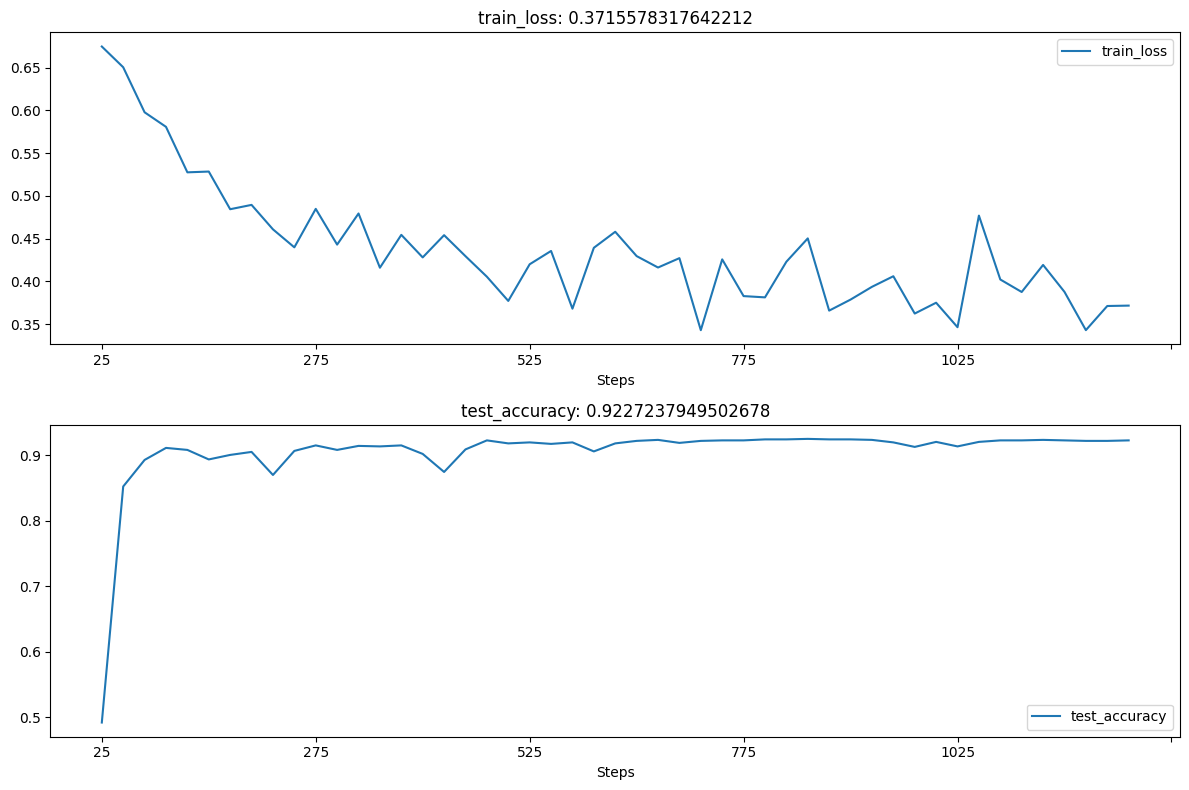

100%|██████████| 15/15 [01:08<00:00,  4.58s/it]


In [24]:
import hiddenlayer as hl
from sklearn.metrics import accuracy_score
import tqdm
mlpc = MLPclass()
# 定义优化器
optimizer = torch.optim.Adam(mlpc.parameters(),lr=0.001)  
loss_func = nn.CrossEntropyLoss()   # 二分类损失函数
# 记录训练过程的指标
history1 = hl.History()
# 使用Canvas进行可视化
canvas1 = hl.Canvas()
print_step = 25
## 对模型进行迭代训练,对所有的数据训练EPOCH轮
for epoch in tqdm.trange(15):
    ## 对训练数据的迭代器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):  
        ## 计算每个batch的
        _, _, output = mlpc(b_x)               # MLP在训练batch上的输出
        train_loss = loss_func(output, b_y.long())   # 二分类交叉熵损失函数
        optimizer.zero_grad()           # 每个迭代步的梯度初始化为0
        train_loss.backward()           # 损失的后向传播，计算梯度
        optimizer.step()                # 使用梯度进行优化
        niter = epoch*len(train_loader)+step+1
        
    ## 计算每经过print_step次迭代后的输出
        if niter % print_step == 0:
            _, _, output = mlpc(test_xt)
            _,pre_lab = torch.max(output,1)
            test_accuracy = accuracy_score(test_yt,pre_lab)
            # 为history添加epoch，损失和精度
            history1.log(niter, train_loss=train_loss, 
                         test_accuracy=test_accuracy)
            # 使用两个图像可视化损失函数和精度
            with canvas1:
                canvas1.draw_plot(history1["train_loss"])
                canvas1.draw_plot(history1["test_accuracy"])

In [12]:
torch.save(mlpc, '/Users/lycoris/Desktop/other/github/MCM2024/Data/641e-3Trmmodel.pkl')
torch.save(mlpc.state_dict(), '/Users/lycoris/Desktop/other/github/MCM2024/Data/641e-3Trmmodel_params.pkl')

In [13]:
## 计算最终模型在测试集上的第二个隐藏层的输出
_,_,test_cla = mlpc(test_xt)
print("test_cla.shape:",test_cla.shape)
## 使用散点图进行可视化


test_fc2.shape: torch.Size([1307, 2])


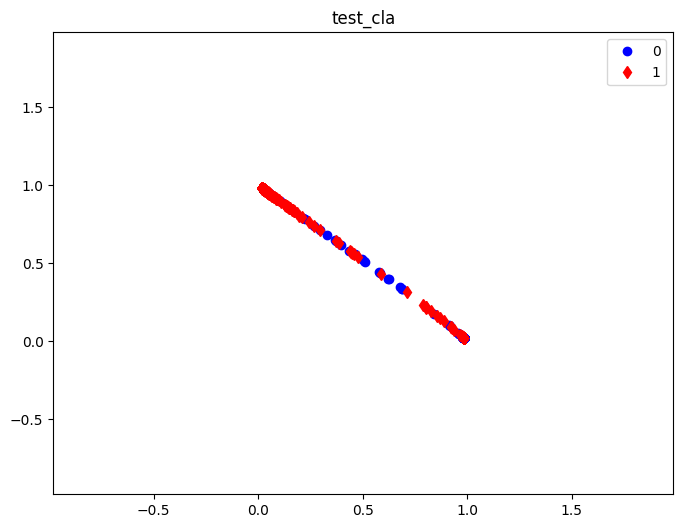

In [18]:
import matplotlib.pyplot as plt
test_cla = test_cla.detach().numpy()
## 将特征进行可视化
plt.figure(figsize=(8,6))
# 可视化前设置坐标系的取值范围
plt.xlim([min(test_cla[:,0]-1),max(test_cla[:,0])+1])
plt.ylim([min(test_cla[:,1]-1),max(test_cla[:,1])+1])
plt.plot(test_cla[test_yt==0,0],test_cla[test_yt==0,1],
         "bo",label = "0")
plt.plot(test_cla[test_yt==1,0],test_cla[test_yt==1,1],
         "rd",label = "1")
plt.legend()
plt.title("test_cla")
plt.show()